Eccentric Ellipsoidal (Heartbeat)
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.2 installed. (You can comment out this line if you don't use pip for your installation or don't want to update to the latest release).

In [ ]:
!pip install -I "phoebe>=2.2,<2.3"

In [1]:
%matplotlib inline

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.ipynb) for more details.

In [1]:
import phoebe
import numpy as np

b = phoebe.default_binary()

Now we need a highly eccentric system that nearly overflows at periastron and is slightly eclipsing.

In [2]:
b.set_value('q', value=0.7)
b.set_value('period', component='binary', value=10)
b.set_value('sma', component='binary', value=25)
b.set_value('incl', component='binary', value=0)
b.set_value('ecc', component='binary', value=0.9)

In [3]:
print(b.filter(qualifier='requiv*', context='component'))

ParameterSet: 4 parameters
        requiv@primary@component: 1.0 solRad
*   requiv_max@primary@component: 1.10053232253 solRad
      requiv@secondary@component: 1.0 solRad
* requiv_max@secondary@component: 0.928057544398 solRad


In [4]:
b.set_value('requiv', component='primary', value=1.1)
b.set_value('requiv', component='secondary', value=0.9)

Adding Datasets
-------------------

We'll add light curve, orbit, and mesh datasets.

In [5]:
b.add_dataset('lc', 
              compute_times=phoebe.linspace(-2, 2, 201),
              dataset='lc01')

<ParameterSet: 20 parameters | contexts: dataset, compute, constraint>

In [6]:
b.add_dataset('orb', compute_times=phoebe.linspace(-2, 2, 201))

<ParameterSet: 6 parameters | contexts: dataset, compute, constraint>

In [7]:
anim_times = phoebe.linspace(-2, 2, 101)

In [8]:
b.add_dataset('mesh', 
              compute_times=anim_times,
              coordinates='uvw',
              dataset='mesh01')

<ParameterSet: 7 parameters | contexts: dataset, compute, constraint>

Running Compute
--------------------

In [9]:
b.run_compute(irrad_method='none')

<ParameterSet: 422 parameters | kinds: mesh, orb, lc>

Plotting 
---------------

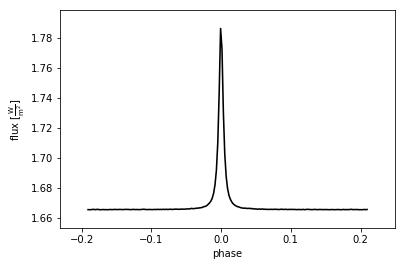

In [10]:
afig, mplfig = b.plot(kind='lc', x='phases', t0='t0_perpass', show=True)

Now let's make a nice figure.

Let's go through these options:
* `time`: make the plot at this single time
* `z`: by default, orbits plot in 2d, but since we're overplotting with a mesh, we want the z-ordering to be correct, so we'll have them plot with w-coordinates in the z-direction.
* `c`: (will be ignored by the mesh): set the color to blue for the primary and red for the secondary (will only affect the orbits as the light curve is not tagged with any component).
* `fc`: (will be ignored by everything but the mesh): set the facecolor to be blue for the primary and red for the secondary.
* `ec`: disable drawing the edges of the triangles in a separate color.  We could also set this to 'none', but then we'd be able to "see-through" the triangle edges.
* `uncover`: for the orbit, uncover based on the current time.
* `trail`: for the orbit, let's show a "trail" behind the current position.
* `highlight`: disable highlighting for the orbit, since the mesh will be in the same position.
* `tight_layout`: use matplotlib's tight layout to ensure we have enough padding between axes to see the labels.

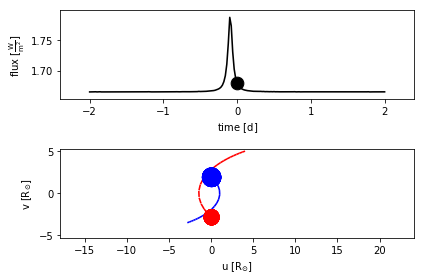

In [11]:
afig, mplfig = b.plot(time=0.0, 
                      z={'orb': 'ws'},
                      c={'primary': 'blue', 'secondary': 'red'},
                      fc={'primary': 'blue', 'secondary': 'red'}, 
                      ec='face', 
                      uncover={'orb': True},
                      trail={'orb': 0.1},
                      highlight={'orb': False},
                      tight_layout=True,
                      show=True)

Now let's animate the same figure in time.  We'll use the same arguments as the static plot above, with the following exceptions:

* `times`: pass our array of times that we want the animation to loop over.
* `pad_aspect`: pad_aspect doesn't work with animations, so we'll disable to avoid the warning messages.
* `animate`: self-explanatory.
* `save`: we could use `show=True`, but that doesn't always play nice with jupyter notebooks
* `save_kwargs`: may need to change these for your setup, to create a gif, passing {'writer': 'imagemagick'} is often useful.

In [ ]:
afig, mplfig = b.plot(times=anim_times, 
                      z={'orb': 'ws'},
                      c={'primary': 'blue', 'secondary': 'red'},
                      fc={'primary': 'blue', 'secondary': 'red'}, 
                      ec='face', 
                      uncover={'orb': True},
                      trail={'orb': 0.1},
                      highlight={'orb': False},
                      tight_layout=True, pad_aspect=False,
                      animate=True, 
                      save='eccentric_ellipsoidal.gif',
                      save_kwargs={'writer': 'imagemagick'})

![gif](eccentric_ellipsoidal.gif)